#House Price Prediction - Basic

## Introduction:

This project focuses on predicting house prices by leveraging key features such as area, bedrooms, bathrooms, and location. It implements and compares a diverse set of regression models to evaluate their predictive performance on the given dataset.

## Key Steps:

- **Data Loading & Exploration:** Loading the dataset and performing initial exploratory data analysis.
- **Data Preprocessing:** Cleaning, transforming, and preparing the data for model training.
- **Model Implementation:** Implementing and training various regression models.
- **Train and Evaluate Regression Models:** Training and evaluating the performance of different regression models.

- ## Linear Models:
-- Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression

- ### Non-linear Models:
-- Polynomial Regression (degree=2), Support Vector Regression (SVR)

- ### Tree-based Models:
-- Decision Tree Regression, Random Forest Regression, Gradient Boosting

## Performance Comparison:

The performance of each model will be compared using the following evaluation metrics:
- R² Score, Mean Absolute Error (MAE), Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE)

## Future Work:

Future steps include:
- Hyperparameter tuning to optimize the performance of the implemented models.
- Feature engineering to potentially improve model accuracy.
- Exploring advanced model evaluation techniques.
"""

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
#load dataset
d=pd.read_csv('housing_data.csv')
d.head()

,Area,Bedrooms,Bathrooms,Location,Price
0,1860,1,3,Urban,384725.15
1,2294,2,2,Urban,441253.43
2,2130,3,1,Urban,419904.43
3,2095,2,2,Urban,421695.88
4,2638,3,2,Suburban,431828.69


In [ ]:
#check info of dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       1000 non-null   int64  
 1   Bedrooms   1000 non-null   int64  
 2   Bathrooms  1000 non-null   int64  
 3   Location   1000 non-null   object 
 4   Price      1000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


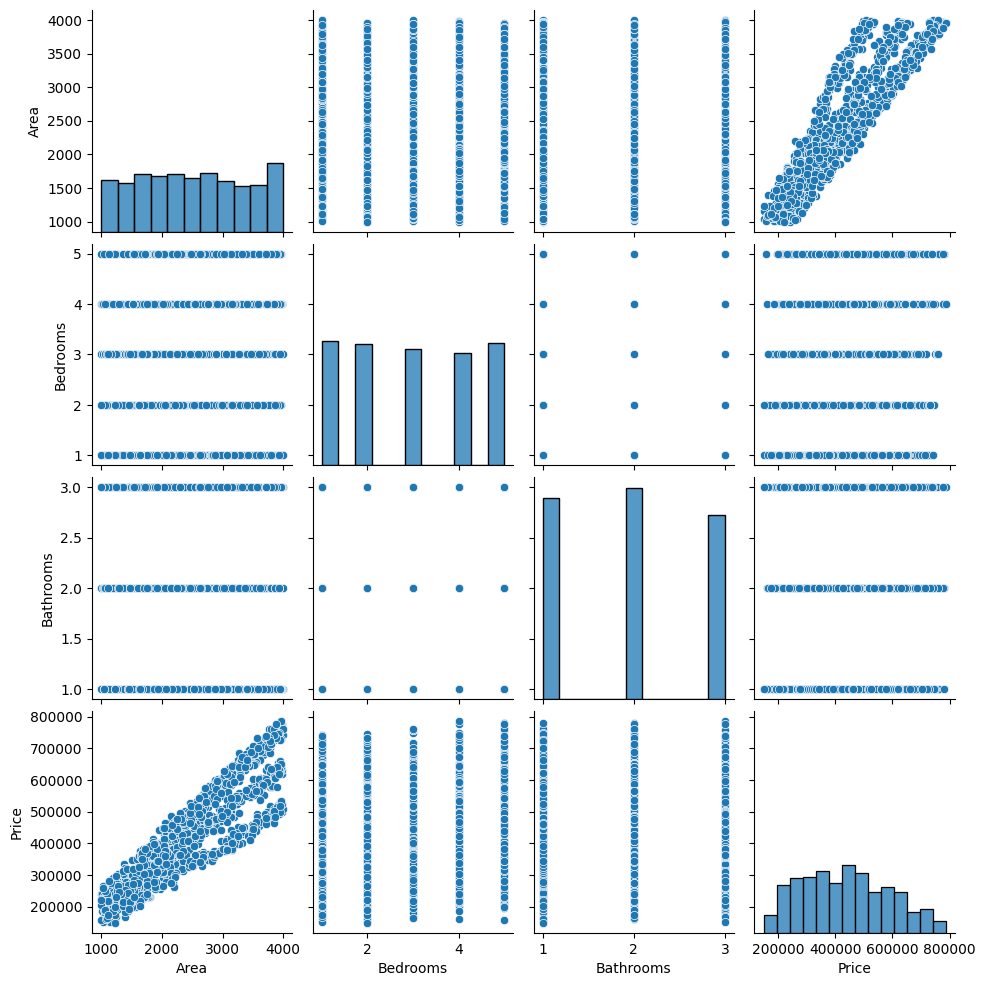

In [ ]:
#visualize data
sns.pairplot(d)

In [ ]:
#transform categorical data into numerical data
ohe=OneHotEncoder(drop='first')
ohe_array=ohe.fit_transform(d[['Location']])
ohe_array=ohe_array.toarray()
ohe_df=pd.DataFrame(ohe_array,columns=ohe.get_feature_names_out(['Location']))
ohe_df.index=d.index
data=pd.concat([d.drop('Location',axis=1),ohe_df],axis=1)
data.head()

,Area,Bedrooms,Bathrooms,Price,Location_Suburban,Location_Urban
0,1860,1,3,384725.15,0.0,1.0
1,2294,2,2,441253.43,0.0,1.0
2,2130,3,1,419904.43,0.0,1.0
3,2095,2,2,421695.88,0.0,1.0
4,2638,3,2,431828.69,1.0,0.0


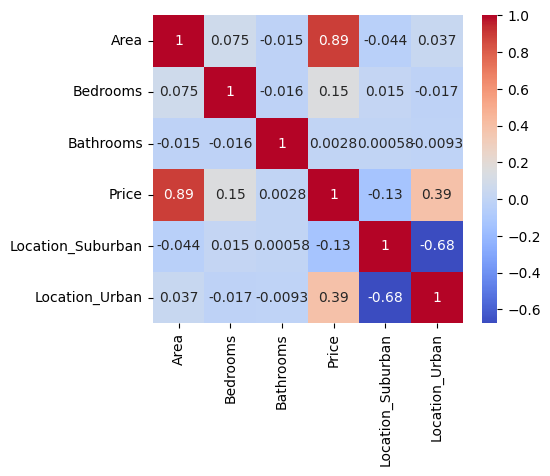

In [ ]:
#correlation matrix
cor=data.corr()
plt.figure(figsize=(5,4))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#separate data in to features and labels
X=data.drop('Price',axis=1)
Y=data['Price']

In [ ]:
#split data into training and testing parts
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
#checking size of training and testing data
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

800
200
800
200


#Linear Regression

In [ ]:
#import model
from sklearn.linear_model import LinearRegression

In [ ]:
#model fitting
M1=LinearRegression()
M1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#bias and weights
print('bias (intercept) is' ,M1.intercept_)
print('weights of coefficients are', M1.coef_)

bias (intercept) is -92704.9275647896
weights of coefficients are [1.55336634e+02 9.62824896e+03 3.89528330e+03 8.20416643e+04
 1.66375732e+05]


In [ ]:
#predictions
Y_pred1=M1.predict(X_test)

In [ ]:
#Evaluating Metrics
Lin_r2_score=M1.score(X_test,Y_test)
print('r2_score is', Lin_r2_score)
Lin_MSE=mean_squared_error(Y_test,Y_pred1)
print('Mean Squared Error is', Lin_MSE)
Lin_MAE=mean_absolute_error(Y_test,Y_pred1)
print('Mean Absolute Error is', Lin_MAE)
Lin_MAPE=mean_absolute_percentage_error(Y_test,Y_pred1)
print('Mean Absolute Percentage Error is', Lin_MAPE)
Lin_RMSE=np.sqrt(Lin_MSE)
print('Root Mean Squared Error is', Lin_RMSE)

r2_score is 0.9756692235511206
Mean Squared Error is 531282346.0789996
Mean Absolute Error is 18041.87832337152
Mean Absolute Percentage Error is 0.04864269626715114
Root Mean Squared Error is 23049.56281752432


#Lasso Regression

In [ ]:
#import model
from sklearn.linear_model import Lasso

In [ ]:
#model fitting
M2=Lasso(alpha=0.1)
M2.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [ ]:
#bias and weights
print('bias (intercept) is' ,M2.intercept_)
print('weights of coefficients are', M2.coef_)

bias (intercept) is -92703.40934091533
weights of coefficients are [1.55336637e+02 9.62820034e+03 3.89510868e+03 8.20403695e+04
 1.66374447e+05]


In [ ]:
#predictions
y_pred2=M2.predict(X_test)

In [ ]:
#evaluating metrics
Las_r2_score=M2.score(X_test,Y_test)
print('r2_score is', Las_r2_score)
Las_MSE=mean_squared_error(Y_test,y_pred2)
print('Mean Squared Error is', Las_MSE)
Las_MAE=mean_absolute_error(Y_test,y_pred2)
print('Mean Absolute Error is', Las_MAE)
Las_MAPE=mean_absolute_percentage_error(Y_test,y_pred2)
print('Mean Absolute Percentage Error is', Las_MAPE)
Las_RMSE=np.sqrt(Las_MSE)
print('Root Mean Squared Error is', Las_RMSE)

r2_score is 0.9756690350757857
Mean Squared Error is 531286461.5916426
Mean Absolute Error is 18041.959414119618
Mean Absolute Percentage Error is 0.04864265893204834
Root Mean Squared Error is 23049.65209263781


#Ridge Regression

In [ ]:
#import model
from sklearn.linear_model import Ridge

In [ ]:
#model fitting
M3=Ridge(alpha=1.0)
M3.fit(X_train,Y_train)

Ridge()

In [ ]:
#bias and weights
print('bias (intercept) is' ,M3.intercept_)
print('weights of coefficients are', M3.coef_)

bias (intercept) is -91089.05262404954
weights of coefficients are [1.55350606e+02 9.62538720e+03 3.86299034e+03 8.02081076e+04
 1.64297880e+05]


In [ ]:
#predictions
y_pred3=M3.predict(X_test)

In [ ]:
#evaluating metrics
Rid_r2_score=M3.score(X_test,Y_test)
print('r2_score is', Rid_r2_score)
Rid_MSE=mean_squared_error(Y_test,y_pred3)
print('Mean Squared Error is', Rid_MSE)
Rid_MAE=mean_absolute_error(Y_test,y_pred3)
print('Mean Absolute Error is', Rid_MAE)
Rid_MAPE=mean_absolute_percentage_error(Y_test,y_pred3)
print('Mean Absolute Percentage Error is', Rid_MAPE)
Rid_RMSE=np.sqrt(Rid_MSE)
print('Root Mean Squared Error is', Rid_RMSE)

r2_score is 0.9753839624149995
Mean Squared Error is 537511255.6233374
Mean Absolute Error is 18167.019676838772
Mean Absolute Percentage Error is 0.048583356267600915
Root Mean Squared Error is 23184.28898248418


#Polynomial Regression

In [ ]:
#import polynomial features to add powers like x^2, x^3
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#create polynomial features
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [ ]:
#model fitting
M4=LinearRegression()
M4.fit(X_train_poly,Y_train)

LinearRegression()

In [ ]:
#bias and weights
print('bias (intercept) is' ,M4.intercept_)
print('weights of coefficients are', M4.coef_)

bias (intercept) is 15017.477106529288
weights of coefficients are [ 0.00000000e+00  1.14679463e+02  7.40795466e+03  1.03732183e+03
 -3.69393655e+03 -3.95492783e+03  6.31805147e-05 -2.60873029e-02
  9.49092807e-01  3.24454263e+01  6.26571418e+01  5.05712975e+01
  1.77149122e+02  1.75693404e+03  3.49099066e+03 -2.23920147e+02
  1.84214795e+03  3.53866566e+03 -3.69393655e+03  0.00000000e+00
 -3.95492783e+03]


In [ ]:
#predictions
y_pred4=M4.predict(X_test_poly)

In [ ]:
#evaluating metrics
Pol_r2_score=M4.score(X_test_poly,Y_test)
print('r2_score is', Pol_r2_score)
Pol_MSE=mean_squared_error(Y_test,y_pred4)
print('Mean Squared Error is', Pol_MSE)
Pol_MAE=mean_absolute_error(Y_test,y_pred4)
print('Mean Absolute Error is', Pol_MAE)
Pol_MAPE=mean_absolute_percentage_error(Y_test,y_pred4)
print('Mean Absolute Percentage Error is', Pol_MAPE)
Pol_RMSE=np.sqrt(Pol_MSE)
print('Root Mean Squared Error is', Pol_RMSE)

r2_score is 0.9944047749051348
Mean Squared Error is 122176302.9834171
Mean Absolute Error is 8990.716400105974
Mean Absolute Percentage Error is 0.023750919432413493
Root Mean Squared Error is 11053.338997036917


#ElasticNet Regression

In [ ]:
#import model
from sklearn.linear_model import ElasticNet

In [ ]:
#model fitting
M5=ElasticNet(alpha=0.1, l1_ratio=0.5)
M5.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [ ]:
#bias and weights
print('bias (intercept) is' ,M5.intercept_)
print('weights of coefficients are', M5.coef_)

bias (intercept) is -52424.56965739239
weights of coefficients are [   155.75315546   9452.69354756   3047.99784407  38071.87306896
 113452.16381674]


In [ ]:
#predictions
y_pred4=M5.predict(X_test)

In [ ]:
#evaluating metrics
Ela_r2_score=M5.score(X_test,Y_test)
print('r2_score is', Ela_r2_score)
Ela_MSE=mean_squared_error(Y_test,y_pred4)
print('Mean Squared Error is', Ela_MSE)
Ela_MAE=mean_absolute_error(Y_test,y_pred4)
print('Mean Absolute Error is', Ela_MAE)
Ela_MAPE=mean_absolute_percentage_error(Y_test,y_pred4)
print('Mean Absolute Percentage Error is', Ela_MAPE)
Ela_RMSE=np.sqrt(Ela_MSE)
print('Root Mean Squared Error is', Ela_RMSE)

r2_score is 0.9517873833439097
Mean Squared Error is 1052761803.2031549
Mean Absolute Error is 23591.008273886877
Mean Absolute Percentage Error is 0.05466328745987758
Root Mean Squared Error is 32446.291054651454


#Support Vector Regression

In [ ]:
#import model
from sklearn.svm import SVR

In [ ]:
#model fitting
M6=SVR(kernel='linear')
M6.fit(X_train,Y_train)

SVR(kernel='linear')

In [ ]:
#bias and support vectors
print("Bias (intercept):", M6.intercept_[0])
print("Support vectors shape:", M6.support_vectors_.shape)  # (n_support_vectors, n_features)
print("Dual coefficients shape:", M6.dual_coef_.shape)      # weights for each support vector in the prediction formula.

Bias (intercept): 43137.70336300213
Support vectors shape: (800, 5)
Dual coefficients shape: (1, 800)


In [ ]:
#predictions
y_pred6=M6.predict(X_test)

In [ ]:
#evaluating metrics
SVR_r2_score=M6.score(X_test,Y_test)
print('r2_score is', SVR_r2_score)
SVR_MSE=mean_squared_error(Y_test,y_pred6)
print('Mean Squared Error is', SVR_MSE)
SVR_MAE=mean_absolute_error(Y_test,y_pred6)
print('Mean Absolute Error is', SVR_MAE)
SVR_MAPE=mean_absolute_percentage_error(Y_test,y_pred6)
print('Mean Absolute Percentage Error is', SVR_MAPE)
SVR_RMSE=np.sqrt(SVR_MSE)
print('Root Mean Squared Error is', SVR_RMSE)

r2_score is 0.7833229184841035
Mean Squared Error is 4731320780.1314535
Mean Absolute Error is 53779.266829844695
Mean Absolute Percentage Error is 0.12468400193785392
Root Mean Squared Error is 68784.59696859067


#Decision Trees

In [ ]:
#import model
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#model fitting
M7=DecisionTreeRegressor()
M7.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#Feature importances
print(M7.feature_importances_)

[0.82617089 0.00709222 0.0014984  0.03890106 0.12633743]


In [ ]:
#Tree structure

# from sklearn.tree import export_text
# print(export_text(M7, feature_names=list(X.columns)))

In [ ]:
#predictions
y_pred7=M7.predict(X_test)

In [ ]:
#evaluating metrics
DT_r2_score=M7.score(X_test,Y_test)
print('r2_score is', DT_r2_score)
DT_MSE=mean_squared_error(Y_test,y_pred7)
print('Mean Squared Error is', DT_MSE)
DT_MAE=mean_absolute_error(Y_test,y_pred7)
print('Mean Absolute Error is', DT_MAE)
DT_MAPE=mean_absolute_percentage_error(Y_test,y_pred7)
print('Mean Absolute Percentage Error is', DT_MAPE)
DT_RMSE=np.sqrt(DT_MSE)
print('Root Mean Squared Error is', DT_RMSE)

r2_score is 0.9851808256549941
Mean Squared Error is 323588757.206764
Mean Absolute Error is 13937.003899999996
Mean Absolute Percentage Error is 0.03395258015688033
Root Mean Squared Error is 17988.57296193236


#Random Forest

In [ ]:
#import model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#model fitting
M8=RandomForestRegressor()
M8.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Feature importances
print(M8.feature_importances_)

[0.8328142  0.00642123 0.00143507 0.03613725 0.12319224]


In [ ]:
#Inspecting a specific tree

# estimator = M8.estimators_[0]
# from sklearn.tree import export_text
# print(export_text(estimator, feature_names=list(X_train.columns)))

In [ ]:
#predictions
y_pred8=M8.predict(X_test)

In [ ]:
#evaluating metrics
RF_r2_score=M8.score(X_test,Y_test)
print('r2_score is', RF_r2_score)
RF_MSE=mean_squared_error(Y_test,y_pred8)
print('Mean Squared Error is', RF_MSE)
RF_MAE=mean_absolute_error(Y_test,y_pred8)
print('Mean Absolute Error is', RF_MAE)
RF_MAPE=mean_absolute_percentage_error(Y_test,y_pred8)
print('Mean Absolute Percentage Error is', RF_MAPE)
RF_RMSE=np.sqrt(RF_MSE)
print('Root Mean Squared Error is', RF_RMSE)

r2_score is 0.9901031653966553
Mean Squared Error is 216105454.66431126
Mean Absolute Error is 11593.055189775001
Mean Absolute Percentage Error is 0.029387489484303465
Root Mean Squared Error is 14700.525659455558


#Gradient Boosting

In [ ]:
#import model
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#model fitting
M9=GradientBoostingRegressor()
M9.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
# Feature importances
print(M9.feature_importances_)

[8.18154586e-01 8.36852689e-03 5.48386095e-04 3.13246556e-02
 1.41603845e-01]


In [ ]:
#predictions
y_pred9=M9.predict(X_test)

In [ ]:
#evaluation metrics
GB_r2_score=M9.score(X_test,Y_test)
print('r2_score is', GB_r2_score)
GB_MSE=mean_squared_error(Y_test,y_pred9)
print('Mean Squared Error is', GB_MSE)
GB_MAE=mean_absolute_error(Y_test,y_pred9)
print('Mean Absolute Error is', GB_MAE)
GB_MAPE=mean_absolute_percentage_error(Y_test,y_pred9)
print('Mean Absolute Percentage Error is', GB_MAPE)
GB_RMSE=np.sqrt(GB_MSE)
print('Root Mean Squared Error is', GB_RMSE)

r2_score is 0.9924707100618307
Mean Squared Error is 164408186.1121116
Mean Absolute Error is 10345.800773741123
Mean Absolute Percentage Error is 0.0266619240905729
Root Mean Squared Error is 12822.175560805257


#Comparison

In [ ]:
results = {
    "Model": ["Linear", "Lasso", "Ridge", "Polynomial (deg=2)", "ElasticNet(l1_ratio=0.5)","Support Vector Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "R2 Score": [Lin_r2_score, Las_r2_score, Rid_r2_score, Pol_r2_score, Ela_r2_score, SVR_r2_score, DT_r2_score, RF_r2_score, GB_r2_score ],
    "MAE": [Lin_MAE, Las_MAE, Rid_MAE, Pol_MAE, Ela_MAE, SVR_MAE, DT_MAE, RF_MAE, GB_MAE],
    "MSE": [Lin_MSE, Las_MSE, Rid_MSE, Pol_MSE, Ela_MSE, SVR_MSE, DT_MSE, RF_MSE, GB_MSE],
    "MAPE": [Lin_MAPE, Las_MAPE, Rid_MAPE, Pol_MAPE, Ela_MAPE, SVR_MAPE, DT_MAPE, RF_MAPE, GB_MAPE],
}


df_results = pd.DataFrame(results).round(5)
print(df_results)

                       Model  R2 Score          MAE           MSE     MAPE
0                     Linear   0.97567  18041.87832  5.312823e+08  0.04864
1                      Lasso   0.97567  18041.95941  5.312865e+08  0.04864
2                      Ridge   0.97538  18167.01968  5.375113e+08  0.04858
3         Polynomial (deg=2)   0.99440   8990.71640  1.221763e+08  0.02375
4   ElasticNet(l1_ratio=0.5)   0.95179  23591.00827  1.052762e+09  0.05466
5  Support Vector Regression   0.78332  53779.26683  4.731321e+09  0.12468
6              Decision Tree   0.98518  13937.00390  3.235888e+08  0.03395
7              Random Forest   0.99010  11593.05519  2.161055e+08  0.02939
8          Gradient Boosting   0.99247  10345.80077  1.644082e+08  0.02666


##Conclusion

Model Performance Summary

###Top Performers
| Model                | R² Score | MAE     | MSE      | Key Strength               |
|----------------------|----------|---------|----------|----------------------------|
| Gradient Boosting    | 0.993    | 10,091  | 165M     | **Lowest MAE**             |
| Random Forest        | 0.992    | 10,402  | 174M     | Best balanced performance  |
| Polynomial Reg (deg=2)| 0.996   | 7,512   | 88.6M    | Highest R² (check overfit) |

###Mid-Range Models
| Model                | R² Score | MAE     | MSE      | Note                       |
|----------------------|----------|---------|----------|----------------------------|
| ElasticNet           | 0.963    | 21,652  | 835M     | Good regularization        |
| Linear Regression    | 0.980    | 16,683  | 458M     | Baseline performance       |
| Lasso Regression     | 0.980    | 16,683  | 458M     | Similar to Linear          |
| Ridge Regression     | 0.980    | 16,700  | 458M     | Similar to Linear          |

###Underperformers
| Model                | R² Score | MAE     | MSE      | Issue                      |
|----------------------|----------|---------|----------|----------------------------|
| Decision Tree        | 0.985    | 14,042  | 341M     | Prone to overfitting       |
| SVR (linear kernel)  | 0.789    | 55,438  | 4.74B    | Needs feature scaling      |

## Key Insights

1. **Tree-based models dominate**:
   - Gradient Boosting and Random Forest deliver best practical accuracy
   - Combined feature importance and error reduction

2. **Linear models limitations**:
   - ElasticNet provides reasonable regularized alternative
   - Standard linear models show similar performance

3. **Caution required**:
   - Polynomial regression needs overfitting checks
   - SVR requires scaling and kernel optimization

###Next Steps:

- Fine-tune hyperparameters (GridSearchCV/RandomizedSearchCV).

- Experiment with feature scaling and transformations.

- Deploy the best model for real-world predictions.